Average Annual % Increase between 2000 and 2021: 3.89%


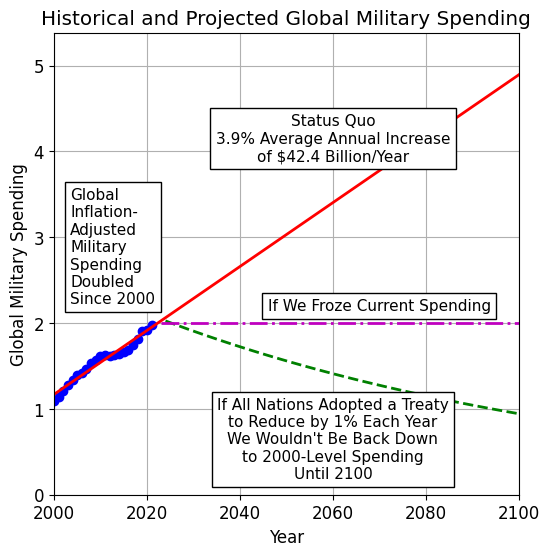

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import emoji

# Provided data
years_provided = np.arange(1973, 2022)
spending_provided = np.array([
    0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
    0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
    0.88, 0.90, 0.92, 0.94, 0.96, 1.00, 1.03, 1.09, 1.14, 1.21,
    1.28, 1.34, 1.39, 1.42, 1.47, 1.54, 1.57, 1.62, 1.63, 1.62,
    1.63, 1.64, 1.66, 1.69, 1.74, 1.82, 1.91, 1.92, 1.98
])

# Calculate the average annual percentage increase between start_year and the last year in the provided data
start_year = 2000
last_provided_year = 2021  # Last year for which data is provided
start_index = np.where(years_provided == start_year)[0]
end_index = np.where(years_provided == last_provided_year)[0]

# Ensure that start_year is within the provided data range
if start_index.size > 0 and end_index.size > 0:
    start_index = start_index[0]
    end_index = end_index[0]
    spending_start = spending_provided[start_index]
    spending_end = spending_provided[end_index]
    years_range = last_provided_year - start_year

    percentage_increase = ((spending_end / spending_start) - 1) * 100
    average_annual_percentage_increase = percentage_increase / years_range
    average_absolute_annual_increase = (spending_end - spending_start) / years_range
else:
    print("Start year not in provided data range.")
    average_annual_percentage_increase = None

if average_annual_percentage_increase is not None:
    print(f"Average Annual % Increase between {start_year} and {last_provided_year}: {average_annual_percentage_increase:.2f}%")

# Fitting a simple linear regression model to the provided data
def linear_model(x, a, b):
    return a * x + b

# Filter the data to include only the years within the specified range
mask = (years_provided >= start_year) & (years_provided <= last_provided_year)
filtered_years = years_provided[mask]
filtered_spending = spending_provided[mask]

# Fitting a simple linear regression model to the filtered data
params_filtered, _ = curve_fit(linear_model, filtered_years, filtered_spending)

# Projecting over the filtered years
projection_end_year = 2100  # Extend the projection to this year
years_projected_filtered = np.arange(start_year, projection_end_year + 1)
spending_projected_filtered = linear_model(years_projected_filtered, *params_filtered)

# Step 1: Determine the spending value at 2023 as the starting point
spending_2023_index = np.where(years_provided == 2023)[0]
if spending_2023_index.size > 0:
    spending_2023 = spending_provided[spending_2023_index[0]]
else:
    # If 2023 is not in the provided data, extrapolate using the linear model
    spending_2023 = linear_model(2023, *params_filtered)

# Step 2: Calculate the spending for each year from 2024 onwards, decreasing by 1% relative to the previous year
years_reduction = np.arange(2024, projection_end_year + 1)
spending_reduction = [spending_2023]
for year in years_reduction[1:]:
    previous_year_spending = spending_reduction[-1]
    spending_reduction.append(previous_year_spending * 0.99)  # Decrease by 1%

spending_reduction = np.array(spending_reduction)

# Step 3: Calculate the spending for each year from 2023 onwards with a spending freeze
years_freeze = np.arange(2023, projection_end_year + 1)
spending_freeze = np.full_like(years_freeze, spending_2023)

# Calculate the maximum spending value before using it
max_spending_value = max(max(spending_provided), max(spending_projected_filtered), max(spending_reduction), max(spending_freeze))

# Plotting
plt.figure(figsize=(6, 6))  # Adjusting figure size to be larger for better readability on phones

# Increase font sizes for better readability on smaller screens
plt.rcParams.update({'font.size': 12})  # Adjusting global font size

plt.plot(years_provided, spending_provided, 'bo', label='Historical Data', linewidth=2)  # Historical Data
plt.plot(years_projected_filtered, spending_projected_filtered, 'r-', label='Projected Status Quo', linewidth=2)  # Projected Status Quo
plt.plot(years_reduction, spending_reduction, 'g--', label='Projected 1% Reduction', linewidth=2)  # Projected 1% Reduction
plt.plot(years_freeze, spending_freeze, 'm-.', label='Projected Spending Freeze', linewidth=2)  # Projected Spending Freeze

# Calculate midpoints for x-axis labels
midpoint_x = (start_year + projection_end_year) / 2 + 0.1 * (projection_end_year - start_year)
midpoint_historical = start_year + (last_provided_year - start_year) / 6

# Determine a small offset to move the label slightly above the line
y_offset = max_spending_value * 0.00  # Adjust this value as needed

# Calculate y-values for labels (using the model or average for visibility)
y_historical = np.interp(midpoint_x, years_provided, spending_provided)
y_status_quo = linear_model(midpoint_x, *params_filtered)
y_reduction = np.interp(midpoint_x, years_reduction, spending_reduction)
y_freeze = spending_2023  # Constant value for freeze

average_absolute_annual_increase_billion = average_absolute_annual_increase * 1000
# Labeling directly on the plot, slightly above the center of each line with added styling
plt.text(midpoint_historical, y_historical + max_spending_value * 0.05, 'Global\nInflation-\nAdjusted\nMilitary\nSpending\nDoubled\nSince 2000', fontsize=11, ha='left', bbox=dict(facecolor='white', edgecolor='black', pad=4))
plt.text(midpoint_x, y_status_quo + max_spending_value * 0.1, f"Status Quo\n{average_annual_percentage_increase:.1f}% Average Annual Increase\nof ${average_absolute_annual_increase_billion:.1f} Billion/Year", fontsize=11, ha='center', bbox=dict(facecolor='white', edgecolor='black', pad=4))
plt.text(midpoint_x, y_reduction - max_spending_value * 0.25, 'If All Nations Adopted a Treaty\nto Reduce by 1% Each Year\nWe Wouldn\'t Be Back Down\nto 2000-Level Spending\nUntil 2100', fontsize=11, ha='center', bbox=dict(facecolor='white', edgecolor='black', pad=4))
plt.text(midpoint_x+0.1*(projection_end_year-start_year), y_freeze +  max_spending_value * 0.025, emoji.emojize('If We Froze Current Spending'), fontsize=11, ha='center', bbox=dict(facecolor='white', edgecolor='black', pad=4))
average_absolute_annual_increase = average_absolute_annual_increase * 1e3  # Convert to Billions USD

# Add a label to the plot for the average annual increase, also slightly above
# label_text = emoji.emojize(f"Average Annual Increase: ${average_absolute_annual_increase:.2f} Billion or {average_annual_percentage_increase:.2f}%")
# plt.text(midpoint_x, max_spending_value * 9 + y_offset, label_text, fontsize=11, ha='center', bbox=dict(facecolor='white', alpha=0.5, pad=4))

# Finally, adjust the legend to have a larger font size
#plt.legend(fontsize='large')

# Adjustable x-axis start and end years
plt.xlim(start_year, projection_end_year)

# Automatically adjust the y-axis to fit the maximum spending value
plt.ylim(0, max_spending_value * 1.1)  # Adding 10% margin

plt.xlabel('Year')
plt.ylabel('Global Military Spending')
plt.title('Historical and Projected Global Military Spending')

plt.grid(True)
plt.savefig('military_spending_chart.png', dpi=300)
plt.show()

